In [28]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import scipy

#import gm2
import trfp
import plotting_functions as plt2
import analysis_helper as helper
import helper_function_candidates as helper_old

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
filename = 'hdf5/9day.h5'

fp_interp_df_1 = pd.read_hdf(filename, key = "fp_df_1")
fp_interp_df_2 = pd.read_hdf(filename, key = "fp_df_2")
fp_interp_df_3 = pd.read_hdf(filename, key = "fp_df_3")
fp_interp_df_4 = pd.read_hdf(filename, key = "fp_df_4")

tr_interp_df_1 = pd.read_hdf(filename, key = "tr_df_1")
tr_interp_df_2 = pd.read_hdf(filename, key = "tr_df_2")
tr_interp_df_3 = pd.read_hdf(filename, key = "tr_df_3")
tr_interp_df_4 = pd.read_hdf(filename, key = "tr_df_4")
tr_interp_df_5 = pd.read_hdf(filename, key = "tr_df_5")
tr_interp_df_6 = pd.read_hdf(filename, key = "tr_df_6")


In [30]:
#plt.plot(tr_interp_df_3.index.values, tr_interp_df_3["fp100"])

In [31]:
fp_moment_df_1 = helper.calc_moment_df(fp_interp_df_1)
fp_moment_df_2 = helper.calc_moment_df(fp_interp_df_2)
fp_moment_df_3 = helper.calc_moment_df(fp_interp_df_3)
fp_moment_df_4 = helper.calc_moment_df(fp_interp_df_4)

tr_moment_df_1 = helper.calc_moment_df(tr_interp_df_1)
tr_moment_df_2 = helper.calc_moment_df(tr_interp_df_2)
tr_moment_df_3 = helper.calc_moment_df(tr_interp_df_3)
tr_moment_df_4 = helper.calc_moment_df(tr_interp_df_4)
tr_moment_df_5 = helper.calc_moment_df(tr_interp_df_5)
tr_moment_df_6 = helper.calc_moment_df(tr_interp_df_6)

Finished calculating all moments for 259834 events.                 
Finished calculating all moments for 201041 events.           
Finished calculating all moments for 234333 events.                
Finished calculating all moments for 154063 events.      
Finished calculating all moments for 4344 events.
Finished calculating all moments for 4357 events.
Finished calculating all moments for 4359 events.
Finished calculating all moments for 4360 events.
Finished calculating all moments for 5015 events.
Finished calculating all moments for 4356 events.


In [32]:
#plt.plot(tr_moment_df_1.index.values, tr_moment_df_1["st1,m1"])

In [33]:
tr_corr_df_1 = helper_old.trolley_footprint_replacement(tr_moment_df_1)
tr_corr_df_2 = helper_old.trolley_footprint_replacement(tr_moment_df_2)
tr_corr_df_3 = helper_old.trolley_footprint_replacement(tr_moment_df_3)
tr_corr_df_4 = helper_old.trolley_footprint_replacement(tr_moment_df_4)
tr_corr_df_5 = helper_old.trolley_footprint_replacement(tr_moment_df_5)
tr_corr_df_6 = helper_old.trolley_footprint_replacement(tr_moment_df_6)

Removing trolley image from station 71.                                                                                                                                              


In [34]:
#plt.plot(tr_corr_df_1.index.values, tr_corr_df_1["st1,m1"])

In [35]:
tr_baseline_1, fp_baseline_1, baseline_time_1, summed_azimuth_1, summed_pts_1 = helper_old.trolley_run_station_average(tr_corr_df_1)
tr_baseline_2, fp_baseline_2, baseline_time_2, summed_azimuth_2, summed_pts_2 = helper_old.trolley_run_station_average(tr_corr_df_2)
tr_baseline_3, fp_baseline_3, baseline_time_3, summed_azimuth_3, summed_pts_3 = helper_old.trolley_run_station_average(tr_corr_df_3)
tr_baseline_4, fp_baseline_4, baseline_time_4, summed_azimuth_4, summed_pts_4 = helper_old.trolley_run_station_average(tr_corr_df_4)
tr_baseline_5, fp_baseline_5, baseline_time_5, summed_azimuth_5, summed_pts_5 = helper_old.trolley_run_station_average(tr_corr_df_5)
tr_baseline_6, fp_baseline_6, baseline_time_6, summed_azimuth_6, summed_pts_6 = helper_old.trolley_run_station_average(tr_corr_df_6)

In [36]:
vtm_df_1 = helper.vtm_calc(fp_moment_df_1,
                         baseline_time_1, baseline_time_2,
                         tr_baseline_1, tr_baseline_2,
                         fp_baseline_1, fp_baseline_2)

vtm_df_2 = helper.vtm_calc(fp_moment_df_2,
                         baseline_time_3, baseline_time_4,
                         tr_baseline_3, tr_baseline_4,
                         fp_baseline_3, fp_baseline_4)

vtm_df_3 = helper.vtm_calc(fp_moment_df_3,
                         baseline_time_4, baseline_time_5,
                         tr_baseline_4, tr_baseline_5,
                         fp_baseline_4, fp_baseline_5)

vtm_df_4 = helper.vtm_calc(fp_moment_df_4,
                         baseline_time_5, baseline_time_6,
                         tr_baseline_5, tr_baseline_6,
                         fp_baseline_5, fp_baseline_6)

In [37]:
#vtm_df_3.head()

In [38]:
#vtm_df_3.tail()

In [39]:
bins_1 = np.arange(1525281055 ,1525540055+200,100)-50
bin_centers_1 = np.arange(1525281055 ,1525540055+100,100)
bins_2 = np.arange(1525586055 ,1525786055+200,100)-50
bin_centers_2 = np.arange(1525586055 ,1525786055+100,100)
bins_3 = np.arange(1525797055 ,1526030055+200,100)-50     ####Added 1000
bin_centers_3 = np.arange(1525797055 ,1526030055+100,100)
bins_4 = np.arange(1526074055 ,1526227055+200,100)-50
bin_centers_4 = np.arange(1526074055 ,1526227055+100,100)

vtm_bin_df_1 = vtm_df_1.groupby(pd.cut(vtm_df_1.index, bins_1)).mean()
vtm_bin_df_1.index = bin_centers_1
vtm_bin_df_2 = vtm_df_2.groupby(pd.cut(vtm_df_2.index, bins_2)).mean()
vtm_bin_df_2.index = bin_centers_2
vtm_bin_df_3 = vtm_df_3.groupby(pd.cut(vtm_df_3.index, bins_3)).mean()
vtm_bin_df_3.index = bin_centers_3
vtm_bin_df_4 = vtm_df_4.groupby(pd.cut(vtm_df_4.index, bins_4)).mean()
vtm_bin_df_4.index = bin_centers_4

azi_avg_df_1 = pd.DataFrame(np.zeros((vtm_bin_df_1.shape[0],6)),
                         index = vtm_bin_df_1.index,
                         columns = ['m' + str(m) for m in np.arange(6)+1])
azi_avg_df_2 = pd.DataFrame(np.zeros((vtm_bin_df_2.shape[0],6)),
                         index = vtm_bin_df_2.index,
                         columns = ['m' + str(m) for m in np.arange(6)+1])
azi_avg_df_3 = pd.DataFrame(np.zeros((vtm_bin_df_3.shape[0],6)),
                         index = vtm_bin_df_3.index,
                         columns = ['m' + str(m) for m in np.arange(6)+1])
azi_avg_df_4 = pd.DataFrame(np.zeros((vtm_bin_df_4.shape[0],6)),
                         index = vtm_bin_df_4.index,
                         columns = ['m' + str(m) for m in np.arange(6)+1])

In [40]:
for m in range(5):
    weight_1 = (summed_azimuth_1[:, m] + summed_azimuth_2[:, m])
    total_weight_1 = np.nansum(weight_1)
    stm_list = ['st'+str(st)+',m'+str(m+1) for st in np.arange(72)]
    azi_avg_df_1['m'+str(m+1)] = vtm_bin_df_1[stm_list].multiply(weight_1).sum(axis=1)/total_weight_1
    
    weight_2 = (summed_azimuth_3[:, m] + summed_azimuth_4[:, m])
    total_weight_2 = np.nansum(weight_2)
    azi_avg_df_2['m'+str(m+1)] = vtm_bin_df_2[stm_list].multiply(weight_2).sum(axis=1)/total_weight_2
    
    weight_3 = (summed_azimuth_4[:, m] + summed_azimuth_5[:, m])
    total_weight_3 = np.nansum(weight_3)
    azi_avg_df_3['m'+str(m+1)] = vtm_bin_df_3[stm_list].multiply(weight_3).sum(axis=1)/total_weight_3
    
    weight_4 = (summed_azimuth_5[:, m] + summed_azimuth_6[:, m])
    total_weight_4 = np.nansum(weight_4)
    azi_avg_df_4['m'+str(m+1)] = vtm_bin_df_4[stm_list].multiply(weight_4).sum(axis=1)/total_weight_4
print_df_1 = azi_avg_df_1[['m1','m2','m3','m4','m5']].copy()
print_df_2 = azi_avg_df_2[['m1','m2','m3','m4','m5']].copy()
print_df_3 = azi_avg_df_3[['m1','m2','m3','m4','m5']].copy()
print_df_4 = azi_avg_df_4[['m1','m2','m3','m4','m5']].copy()

In [41]:
def plt_unix_time_to_CST(ax):
    ax.locator_params(axis='x', nbins=5)
    xticks = ax.get_xticks()
    ax.set_xticklabels([pd.to_datetime(tm, unit='s').tz_localize('UTC').tz_convert('US/Central').strftime('%Y-%m-%d\n %H:%M:%S %Z')
                        for tm in xticks], rotation=0, fontdict={'size':12, 'family':'serif'})

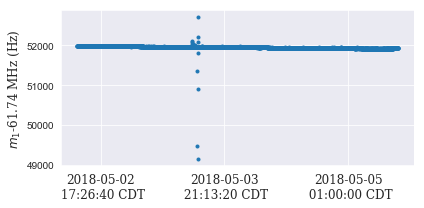

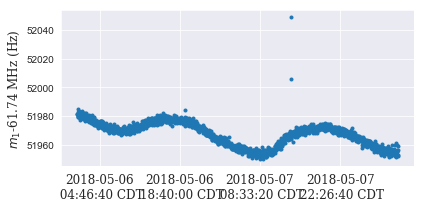

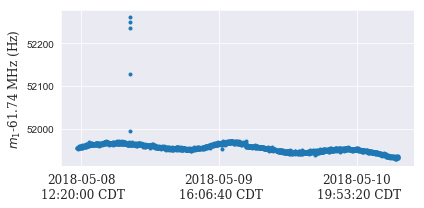

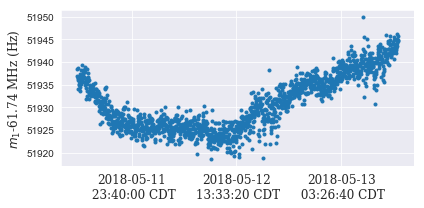

In [42]:
sns.set_style('darkgrid')

#fp1
fig2, ax2 = plt.subplots(1,1)
m = 1
ax2.plot(print_df_1.index.values, print_df_1['m'+str(m)], '.')
ax2.set_ylabel('$m_'+str(m)+'$-61.74 MHz (Hz)', fontdict={'size':12, 'family':'serif'})
plt_unix_time_to_CST(ax2)
fig2.set_size_inches(6,3)
fig2.tight_layout()

#fp2
fig3, ax3 = plt.subplots(1,1)
m = 1
ax3.plot(print_df_2.index.values, print_df_2['m'+str(m)], '.')
ax3.set_ylabel('$m_'+str(m)+'$-61.74 MHz (Hz)', fontdict={'size':12, 'family':'serif'})
plt_unix_time_to_CST(ax3)
fig3.set_size_inches(6,3)
fig3.tight_layout()

#fp3
fig4, ax4 = plt.subplots(1,1)
m = 1
ax4.plot(print_df_3.index.values, print_df_3['m'+str(m)], '.')
ax4.set_ylabel('$m_'+str(m)+'$-61.74 MHz (Hz)', fontdict={'size':12, 'family':'serif'})
plt_unix_time_to_CST(ax4)
fig4.set_size_inches(6,3)
fig4.tight_layout()

#fp4
fig5, ax5 = plt.subplots(1,1)
m = 1
ax5.plot(print_df_4.index.values, print_df_4['m'+str(m)], '.')
ax5.set_ylabel('$m_'+str(m)+'$-61.74 MHz (Hz)', fontdict={'size':12, 'family':'serif'})
plt_unix_time_to_CST(ax5)
fig5.set_size_inches(6,3)
fig5.tight_layout()

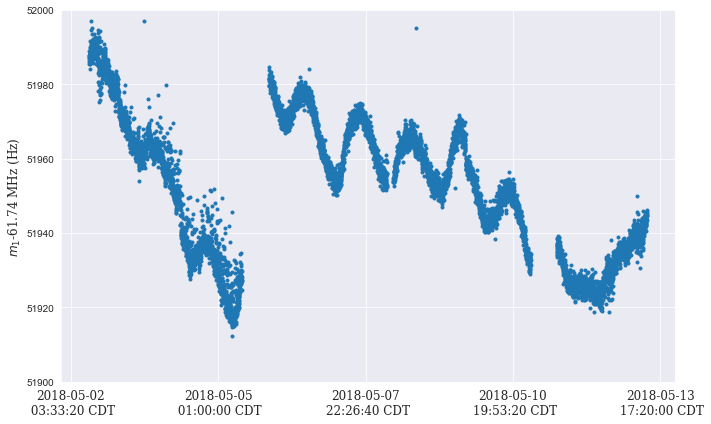

In [43]:
#All
fig6, ax6 = plt.subplots(1,1)
m = 1
Nine_days = [print_df_1, print_df_2, print_df_3, print_df_4]
print_df_9d = pd.concat(Nine_days)
ax6.plot(print_df_9d.index.values, print_df_9d['m'+str(m)], '.')
ax6.set_ylabel('$m_'+str(m)+'$-61.74 MHz (Hz)', fontdict={'size':12, 'family':'serif'})
plt_unix_time_to_CST(ax6)
plt.ylim(51900,52000)
fig6.set_size_inches(10,6)
fig6.tight_layout()